# Virus × EVE's classification

___Inference___

### Initialization

Imports

In [47]:
import pandas as pd

Parameters

In [48]:
path_root = '/home/small_rna_metavir/src'
# path_runs = f'{path_root}/virus-eves/runs'

## Build Model _(Random Forest Classifier)_

Import data

In [49]:
path_ds_eves = f'{path_root}/ds/virus-eves/ds_virus-eves.tab'

In [50]:
df_eves = pd.read_table(path_ds_eves, index_col='V1')

### Separate: X _(features)_ × Y _(classes)_

In [51]:
col_class_eve = 'class'
x_range_eve = list(range(4, 52))

In [52]:
X_eves = df_eves.iloc[:, x_range_eve]
y_eves = df_eves[col_class_eve]
n_samples, n_features = X_eves.shape

print(f"n_samples: {n_samples} × n_features: {n_features}")
print(f'y.shape ({col_class_eve}): {y_eves.shape}')
print(f'X.shape: {X_eves.shape}')


n_samples: 2315 × n_features: 48
y.shape (class): (2315,)
X.shape: (2315, 48)


In [53]:
feat_eves = X_eves.columns
feat_eves

Index(['X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X.15', 'X.16', 'X.17', 'X.18', 'X.19', 'X.20', 'X.21', 'X.22',
       'X.23', 'X.24', 'X.25', 'X.26', 'X.27', 'X.28', 'X.29', 'X.30', 'X.31',
       'X.32', 'X.33', 'X.34', 'X.35', 'dens15to18', 'dens20to22',
       'dens25to29', 'ratiosi_pi', 'ratio_si', 'dens18to35'],
      dtype='object')

**Class names**

_Classes are clearly unbalanced. It will be necessary to handle this when splitting test × training data..._

In [54]:
classes = list(y_eves.unique())
class_counts = list(y_eves.value_counts())
y_eves.value_counts()

viral    1321
eve       994
Name: class, dtype: int64

### Train

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Split training × testing data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_eves, y_eves, test_size=0.3, random_state=13, stratify=y_eves)

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X_train.shape: (1620, 48), y_train.shape: (1620,)
X_test.shape: (695, 48), y_test.shape: (695,)


Train

In [57]:
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Check test classification accuracy

In [58]:
y_hat = classifier.predict(X_test)
accuracy = (y_hat == y_test).sum() / y_test.shape[0]
print(f'accuracy: {100 * accuracy}')

accuracy: 92.66187050359711


## Parse Dark Matter Data

Import Data

In [90]:
path_ds_libs = [
    ('RKPM44_01', f'{path_root}/ds/virus-dark-matter/ds_virus-dark-matter-RKPM44.tab'),
    ('RNPM221_01', f'{path_root}/ds/virus-dark-matter/ds_virus-dark-matter-RNPM221_01.tab'),
    ('ZIKV_01', f'{path_root}/ds/virus-dark-matter/ds_virus-dark-matter-ZIKV_01.tab'),
]

In [91]:
# lib_id, lib_path = path_ds_libs[0]
# lib_id, lib_path = path_ds_libs[1]
lib_id, lib_path = path_ds_libs[2]
df_dark = pd.read_table(lib_path)

print(f'Parsing lib "{lib_id}" ({lib_path})')

Parsing lib "ZIKV_01" (/home/small_rna_metavir/src/ds/virus-dark-matter/ds_virus-dark-matter-ZIKV_01.tab)


### EDA

In [92]:
df_dark.head()

Contigs_ID Similarity_label        15        16  \
0  bN_ZIKV_01_Contig10113_10112            viral -0.485935 -0.485935   
1  bN_ZIKV_01_Contig10114_10113            viral -0.442464 -0.442464   
2  bN_ZIKV_01_Contig10119_10118            viral -0.491616 -0.491616   
3  bN_ZIKV_01_Contig10121_10120            viral -0.459970 -0.459970   
4  bN_ZIKV_01_Contig10122_10121            viral -0.537762 -0.537762   

         17        18        19        20        21        22  ...       -33  \
0 -0.485935 -0.485935 -0.149812  0.777072  4.942960  1.627565  ... -0.485935   
1 -0.442464 -0.442464 -0.134024  0.562168  4.668818  0.905857  ... -0.424839   
2 -0.491616 -0.491616 -0.324652  0.944274  4.995933  1.255940  ... -0.491616   
3 -0.459970 -0.459970 -0.249798  0.969199  5.204161  1.273948  ... -0.449461   
4 -0.537762 -0.537762 -0.195699  0.541051  4.698426  0.975207  ... -0.537762   

        -34       -35  dens15to18  dens20to22  dens25to29  ratiosi_pi  \
0 -0.485935 -0.485935   -16.60964    0.887160   -0.349718    1.236879   
1 -0.433651 -0.442464   -16.60964    0.719381   -0.679344    1.398725   
2 -0.491616 -0.491616   -16.60964    0.768809   -0.348486    1.117295   
3 -0.459970 -0.459970   -16.60964    0.939270   -0.475768    1.415037   
4 -0.537762 -0.537762   -16.60964    0.695743   -0.190389    0.886132   

   ratio_si  dens18to35  length  
0  1.041477    1.746283    1389  
1  0.386368    1.439067     908  
2  0.918979    1.626999     699  
3  1.013806    1.706020     655  
4  0.435386    1.652590     639  

[5 rows x 51 columns]

In [62]:
df_dark.shape

(379, 51)

In [63]:
df_dark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contigs_ID        379 non-null    object 
 1   Similarity_label  379 non-null    object 
 2   15                379 non-null    float64
 3   16                379 non-null    float64
 4   17                379 non-null    float64
 5   18                379 non-null    float64
 6   19                379 non-null    float64
 7   20                379 non-null    float64
 8   21                379 non-null    float64
 9   22                379 non-null    float64
 10  23                379 non-null    float64
 11  24                379 non-null    float64
 12  25                379 non-null    float64
 13  26                379 non-null    float64
 14  27                379 non-null    float64
 15  28                379 non-null    float64
 16  29                379 non-null    float64
 1

In [64]:
df_dark.describe()

15          16          17          18          19          20  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    -0.479069   -0.479069   -0.479069   -0.472752   -0.391113   -0.173435   
std      0.150572    0.150572    0.150572    0.141038    0.159177    0.558446   
min     -1.257194   -1.257194   -1.257194   -1.206948   -0.804981   -0.584614   
25%     -0.501982   -0.501982   -0.501982   -0.501191   -0.461683   -0.404079   
50%     -0.436235   -0.436235   -0.436235   -0.435897   -0.408632   -0.356786   
75%     -0.388306   -0.388306   -0.388306   -0.386885   -0.361077   -0.295389   
max     -0.190817   -0.190817   -0.190817   -0.190817    1.152984    4.589542   

               21          22          23          24  ...         -33  \
count  379.000000  379.000000  379.000000  379.000000  ...  379.000000   
mean     0.102078    0.597395    1.550176    2.856069  ...   -0.457316   
std      0.899264    1.199129    1.094929    1.312899  ...    0.129828   
min     -0.527345   -0.397307   -0.277457   -0.262120  ...   -0.972467   
25%     -0.336312   -0.089349    0.780014    2.001636  ...   -0.492940   
50%     -0.241098    0.120543    1.323635    2.918468  ...   -0.425007   
75%     -0.066119    0.643299    2.058877    3.729228  ...   -0.382144   
max      6.758215    5.682392    6.769871    6.533159  ...    0.211688   

              -34         -35  dens15to18  dens20to22  dens25to29  ratiosi_pi  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    -0.448256   -0.461025  -14.828657   -0.551878    2.320040   -2.871918   
std      0.249885    0.127457    3.985223    2.019140    1.502096    1.874428   
min     -0.884367   -0.884367  -16.609640   -4.714246   -3.651052   -7.700913   
25%     -0.496405   -0.497717  -16.609640   -2.022757    1.493806   -4.067941   
50%     -0.428817   -0.429141  -16.609640   -0.889220    2.243557   -3.229549   
75%     -0.383678   -0.384814  -16.609640    0.599493    3.175468   -2.265344   
max      3.748758   -0.020322   -1.662462    7.936774    6.785880    6.297364   

         ratio_si  dens18to35       length  
count  379.000000  379.000000   379.000000  
mean     0.938885    3.371946   374.356201  
std      4.748982    1.437299   230.184737  
min    -16.609640    0.354843   200.000000  
25%      0.550283    2.428486   234.500000  
50%      1.358410    3.170930   297.000000  
75%      2.386295    4.072809   415.000000  
max     15.866603    8.686568  2144.000000  

[8 rows x 49 columns]

Check for missing values

In [65]:
df_dark.isnull().sum().sum() # Whole data frame
# df_virus_dark_matter.isna().sum().sort_values(ascending=False)[2:] # By columns

0

### Separate: X _(features)_ × Y _(classes)_ ×  ID's _(contig ID's)_

In [93]:
col_class_dark = 'Similarity_label'
col_id_dark = 'Contigs_ID'
x_range_dark = list(range(2, 51))

In [94]:
ids = df_dark[col_id_dark] # Contig ID's
X_dark = df_dark.iloc[:, x_range_dark] # Feature Values
y_dark = df_dark[col_class_dark] # Labels
n_samples, n_features = X_dark.shape

print(f"n_samples: {n_samples} × n_features: {n_features}")
print(f"ID's -> ids.shape {ids.shape} ({ids.unique().shape[0]} are unique)")
print(f'y.shape ({col_class_dark}): {y_dark.shape}')
print(f'X.shape: {X_dark.shape}')

n_samples: 742 × n_features: 49
ID's -> ids.shape (742,) (742 are unique)
y.shape (Similarity_label): (742,)
X.shape: (742, 49)


In [95]:
feat_dark = X_dark.columns
feat_dark

Index(['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '-15', '-16',
       '-17', '-18', '-19', '-20', '-21', '-22', '-23', '-24', '-25', '-26',
       '-27', '-28', '-29', '-30', '-31', '-32', '-33', '-34', '-35',
       'dens15to18', 'dens20to22', 'dens25to29', 'ratiosi_pi', 'ratio_si',
       'dens18to35', 'length'],
      dtype='object')

Check if all features data is numeric

_Yes, they are..._

In [96]:
set(X_dark.dtypes)

{dtype('int64'), dtype('float64')}

**Class names**

_We can see that the 3 classes are relatively well balanced..._

In [97]:
classes = list(y_dark.unique())
class_counts = list(y_dark.value_counts())
y_dark.value_counts()

nonviral    346
nohit       330
viral        66
Name: Similarity_label, dtype: int64

### Transform data to classify

In [98]:
feat_eves

Index(['X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X.15', 'X.16', 'X.17', 'X.18', 'X.19', 'X.20', 'X.21', 'X.22',
       'X.23', 'X.24', 'X.25', 'X.26', 'X.27', 'X.28', 'X.29', 'X.30', 'X.31',
       'X.32', 'X.33', 'X.34', 'X.35', 'dens15to18', 'dens20to22',
       'dens25to29', 'ratiosi_pi', 'ratio_si', 'dens18to35'],
      dtype='object')

In [99]:
feat_dark

Index(['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '-15', '-16',
       '-17', '-18', '-19', '-20', '-21', '-22', '-23', '-24', '-25', '-26',
       '-27', '-28', '-29', '-30', '-31', '-32', '-33', '-34', '-35',
       'dens15to18', 'dens20to22', 'dens25to29', 'ratiosi_pi', 'ratio_si',
       'dens18to35', 'length'],
      dtype='object')

Common features

In [100]:
feat_common = [f for f in feat_eves if f in feat_dark]
feat_common

['dens15to18',
 'dens20to22',
 'dens25to29',
 'ratiosi_pi',
 'ratio_si',
 'dens18to35']

Build new data frame

In [101]:

# Create new data frame
df_dark2 = pd.DataFrame()

df_dark2[col_id_dark] = df_dark[col_id_dark]
df_dark2[col_class_dark] = df_dark[col_class_dark]

# Add features with proper names
feat_dark2 = []

for i in range(15, 35 + 1):
    feat_sense = f'X{i}'
    feat_dark2.append(feat_sense)
    df_dark2[feat_sense] = X_dark[f'{i}']

for i in range(15, 35 + 1):
    feat_anti_sense = f'X.{i}'
    feat_dark2.append(feat_anti_sense)
    df_dark2[feat_anti_sense] = X_dark[f'-{i}']

df_dark2[feat_common] = X_dark[feat_common].copy()
feat_dark2 += feat_common.copy()


Check features

In [102]:
n_match_feats = sum(feat_dark2 == feat_eves)

print(f'feat_eves: {len(feat_eves)}') 
print(f'feat_dark2: {len(feat_dark2)}')
print(f'n_match_feats: {n_match_feats}')

feat_eves: 48
feat_dark2: 48
n_match_feats: 48


In [103]:
df_dark2.head()

Contigs_ID Similarity_label       X15       X16  \
0  bN_ZIKV_01_Contig10113_10112            viral -0.485935 -0.485935   
1  bN_ZIKV_01_Contig10114_10113            viral -0.442464 -0.442464   
2  bN_ZIKV_01_Contig10119_10118            viral -0.491616 -0.491616   
3  bN_ZIKV_01_Contig10121_10120            viral -0.459970 -0.459970   
4  bN_ZIKV_01_Contig10122_10121            viral -0.537762 -0.537762   

        X17       X18       X19       X20       X21       X22  ...      X.32  \
0 -0.485935 -0.485935 -0.149812  0.777072  4.942960  1.627565  ... -0.475750   
1 -0.442464 -0.442464 -0.134024  0.562168  4.668818  0.905857  ... -0.433651   
2 -0.491616 -0.491616 -0.324652  0.944274  4.995933  1.255940  ... -0.469354   
3 -0.459970 -0.459970 -0.249798  0.969199  5.204161  1.273948  ... -0.459970   
4 -0.537762 -0.537762 -0.195699  0.541051  4.698426  0.975207  ... -0.537762   

       X.33      X.34      X.35  dens15to18  dens20to22  dens25to29  \
0 -0.485935 -0.485935 -0.485935   -16.60964    0.887160   -0.349718   
1 -0.424839 -0.433651 -0.442464   -16.60964    0.719381   -0.679344   
2 -0.491616 -0.491616 -0.491616   -16.60964    0.768809   -0.348486   
3 -0.449461 -0.459970 -0.459970   -16.60964    0.939270   -0.475768   
4 -0.537762 -0.537762 -0.537762   -16.60964    0.695743   -0.190389   

   ratiosi_pi  ratio_si  dens18to35  
0    1.236879  1.041477    1.746283  
1    1.398725  0.386368    1.439067  
2    1.117295  0.918979    1.626999  
3    1.415037  1.013806    1.706020  
4    0.886132  0.435386    1.652590  

[5 rows x 50 columns]

## Classify Dark Matter DB sequences

In [104]:
y_hat = classifier.predict(df_dark2[feat_dark2])
df_dark2[col_class_eve] = y_hat.copy()

### Build report

In [105]:
report_name = f'{lib_id}-report'
report_name

'ZIKV_01-report'

In [106]:
cols_report = [col_class_dark, col_class_eve, col_id_dark]

In [107]:
df_report = df_dark2[cols_report].copy()
df_report = df_report.sort_values(by=cols_report, ascending=True).reset_index()[cols_report]

In [108]:

print(f'-- {lib_id} Classification Summary --')
df_report.groupby(col_class_dark)[col_class_eve].value_counts()

-- ZIKV_01 Classification Summary --


Similarity_label  class
nohit             eve      248
                  viral     82
nonviral          eve      249
                  viral     97
viral             eve       33
                  viral     33
Name: class, dtype: int64

Export report as .csv

In [109]:
#
# TODO 23-06-14: Make report files saving worl
#

path_csv = f'{path_root}/{report_name}.csv'
print(f'path_csv: {path_csv}')
# df_report.to_csv(path_csv, index=False)

path_csv: /home/small_rna_metavir/src/ZIKV_01-report.csv


### Plot report table

In [110]:
import matplotlib.pyplot as plt

path_table: ZIKV_01-report.png


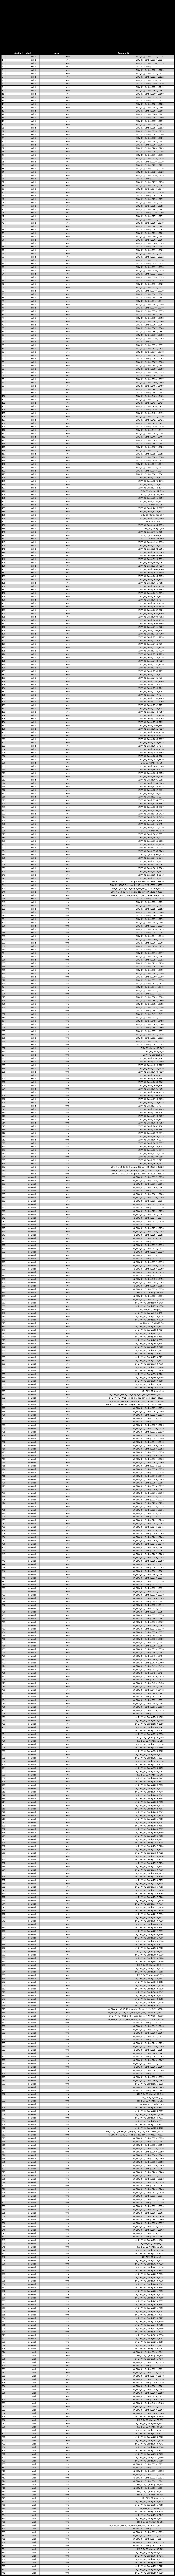

In [111]:
fig, ax = plt.subplots()
ax.axis('off')  # Hide axis

table = pd.plotting.table(ax, df_report)

table.auto_set_font_size(False)
table.scale(2, 1.5)

# Customize table design
for (row, col), cell in table.get_celld().items():
    
    # Header row
    if row == 0:
        cell.set_text_props(size=10, weight='bold', color='white')
        cell.set_facecolor('black')
    
    # Data rows
    else:
        cell.set_text_props(size=10, color='black')
        if row % 2:
            cell.set_facecolor('lightgray')
    
    # Contig ID column
    if col == 2:
        cell.set_width(1.5)
    # Other columns
    else:
        cell.set_width(.5)

#
# TODO 23-06-14: Make report files saving work
#

# path_table = f'{path_root}/{report_name}.png'
path_table = f'{report_name}.png'
print(f'path_table: {path_table}')
# plt.savefig(path_table)

plt.show()